In [1]:
'''
数据集：TV/Radio/Nespaper 渠道的资金投放量，推测销售额
'''

'\n\xe6\x95\xb0\xe6\x8d\xae\xe9\x9b\x86\xef\xbc\x9aTV/Radio/Nespaper \xe6\xb8\xa0\xe9\x81\x93\xe7\x9a\x84\xe8\xb5\x84\xe9\x87\x91\xe6\x8a\x95\xe6\x94\xbe\xe9\x87\x8f\xef\xbc\x8c\xe6\x8e\xa8\xe6\xb5\x8b\xe9\x94\x80\xe5\x94\xae\xe9\xa2\x9d\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('Advertising.csv',header=0)

In [5]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
X = data[['TV','Radio','Newspaper']]
y = data['Sales']

print type(X), type(y)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


## 在同一张画布，分别绘制特征与结果的关系

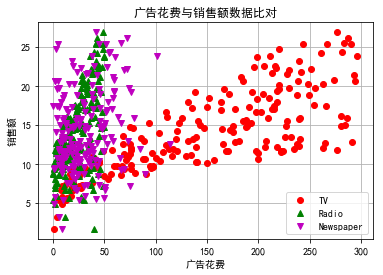

In [15]:
mpl.rcParams['font.sans-serif'] = [u'simHei']

plt.figure()
plt.plot(data['TV'], y, 'ro', label='TV')
plt.plot(data['Radio'], y, 'g^', label='Radio')
plt.plot(data['Newspaper'], y, 'mv', label='Newspaper')
plt.legend(loc='lower right')
plt.xlabel(u'广告花费')
plt.ylabel(u'销售额')
plt.title(u'广告花费与销售额数据比对')
plt.grid()
plt.show()

## 在同一张画布上，对三个特征分别作与销售额关系子图

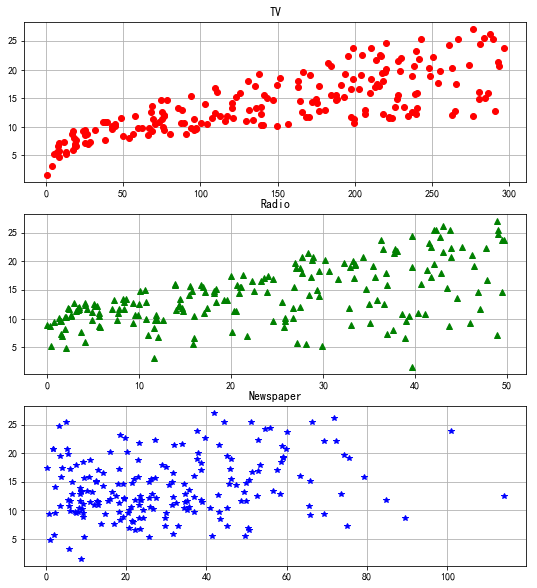

In [17]:
plt.figure(figsize=(9,10))
plt.subplot(311)
plt.plot(data['TV'], y, 'ro', label='TV')
plt.title('TV')
plt.grid()

plt.subplot(312)
plt.plot(data['Radio'], y, 'g^', label='Radio')
plt.title('Radio')
plt.grid()

plt.subplot(313)
plt.plot(data['Newspaper'], y, 'b*', label='Newspaper')
plt.title('Newspaper')
plt.grid()

plt.show()

## 三个特征一起使用，采用线性回归拟合

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.8, random_state=1)

print X_train.shape, y_train.shape

(160, 3) (160L,)


In [21]:
lineReg = LinearRegression()

In [22]:
model = lineReg.fit(X_train, y_train)

print model
print lineReg.coef_, lineReg.intercept_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 0.0468431   0.17854434  0.00258619] 2.90794702082


## 使用上面模型进行预测

In [23]:
# 对测试集数据排序，使绘图更形象

In [24]:
order = y_test.argsort(axis=0)
y_test = y_test.values[order]
X_test = X_test.values[order, :]

y_pred = lineReg.predict(X_test)
mse = np.average((y_pred - np.array(y_test))**2)
rmse = np.sqrt(mse)

print 'mse =', mse
print 'rmse =', rmse
print 'r2 =', lineReg.score(X_train, y_train)
print 'r2 =', lineReg.score(X_test, y_test)

mse = 1.99188555183
rmse = 1.41134175586
r2 = 0.895937263233
r2 = 0.892760591462


## 预测值与真实值绘图比对

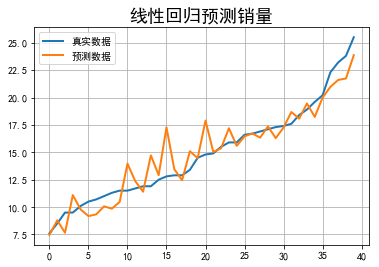

In [27]:
t = np.arange(len(X_test))
plt.plot(t, y_test, linewidth=2, label=u'真实数据')
plt.plot(t, y_pred, linewidth=2, label=u'预测数据')
plt.legend(loc='upper left')
plt.title(u'线性回归预测销量', fontsize=18)
plt.grid(b=True)
plt.show()